<div style="text-align: center; padding: 20px; background-color: #000000; border-radius: 10px; margin: 20px 0;">
    <h1 style="color: #008080 	;">Regression Analysis on Diabetes dataset from the scikit-learn library<h1>
    <hr style="border: 2px solid #008080;">
</div>

In this project we will explore various loss functions and apply gradient descent methods to optimize these functions. Your focus will be on the Diabetes dataset from the scikit-learn library, a well-regarded dataset in the machine learning community. This dataset
consists of medical diagnostic measurements from numerous patients and is specifically designed to study diabetes progression. We will use these data points to predict the quantitative measure of disease progression one year after baseline, thus practicing the
application of regression analysis in a medical context

## Import Needed Libraries

In [1]:
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import math
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
TEST_SIZE = 0.2

# Warm-up: Exploring the Diabetes Dataset

### Loading Dataset

In [3]:
diabetes = datasets.load_diabetes(scaled=False, as_frame=True)
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['disease-progression'] = diabetes.target

### Showing First Rows

In [4]:
display(diabetes_df.head(10))

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease-progression
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
5,23.0,1.0,22.6,89.0,139.0,64.8,61.0,2.00,4.1897,68.0,97.0
6,36.0,2.0,22.0,90.0,160.0,99.6,50.0,3.00,3.9512,82.0,138.0
7,66.0,2.0,26.2,114.0,255.0,185.0,56.0,4.55,4.2485,92.0,63.0
8,60.0,2.0,32.1,83.0,179.0,119.4,42.0,4.00,4.4773,94.0,110.0
9,29.0,1.0,30.0,85.0,180.0,93.4,43.0,4.00,5.3845,88.0,310.0


### Showing Data Types

In [5]:
display(diabetes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  442 non-null    float64
 1   sex                  442 non-null    float64
 2   bmi                  442 non-null    float64
 3   bp                   442 non-null    float64
 4   s1                   442 non-null    float64
 5   s2                   442 non-null    float64
 6   s3                   442 non-null    float64
 7   s4                   442 non-null    float64
 8   s5                   442 non-null    float64
 9   s6                   442 non-null    float64
 10  disease-progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


None

As we can see, all columns are numerical (float64) and there are no missing values.

### Handling Missing Values

In [6]:
def count_nulls(df):
    for col in df.columns:
        print(f'column {col} has {df[col].isnull().sum()} missing values')
count_nulls(diabetes_df)

column age has 0 missing values
column sex has 0 missing values
column bmi has 0 missing values
column bp has 0 missing values
column s1 has 0 missing values
column s2 has 0 missing values
column s3 has 0 missing values
column s4 has 0 missing values
column s5 has 0 missing values
column s6 has 0 missing values
column disease-progression has 0 missing values


As we can see, and also it was mentioned before, there are no missing values in this dataset so we can proceed to the next step.

### Normalizing Features

In this part wr will normalize the features to ensure all are on a similar scale. For this purpose we use Min-Max scaling which scales the data to a fixed range, typically between 0 and 1.

In [7]:
def normalize_data(df, scaler = MinMaxScaler()):
    df[df.columns] = scaler.fit_transform(df[df.columns])

normalize_data(diabetes_df)
display(diabetes_df.head(10))

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease-progression
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394,0.392523
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222437,0.166667,0.155763
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496578,0.409091,0.361371
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572923,0.469697,0.563863
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362385,0.333333,0.342679
5,0.066667,0.0,0.190083,0.380282,0.205882,0.115538,0.506494,0.000000,0.327003,0.151515,0.224299
6,0.283333,1.0,0.165289,0.394366,0.308824,0.288845,0.363636,0.141044,0.243287,0.363636,0.352025
7,0.783333,1.0,0.338843,0.732394,0.774510,0.714143,0.441558,0.359661,0.347643,0.515152,0.118380
8,0.683333,1.0,0.582645,0.295775,0.401961,0.387450,0.259740,0.282087,0.427955,0.545455,0.264798
9,0.166667,0.0,0.495868,0.323944,0.406863,0.257968,0.272727,0.282087,0.746393,0.454545,0.887850


### Splitting the data into Training and Testing sets

In this part we will split the data into training and testing sets. We will use 80% of the data for training and 20% for testing.

In [8]:
def split_train_test(df, target_column, test_size=TEST_SIZE):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_train_test(diabetes_df, 'disease-progression')
print(f'shape of X_train: {X_train.shape}')
print(f'shape of X_test: {X_test.shape}')
print(f'shape of y_train: {y_train.shape}')
print(f'shape of y_test: {y_test.shape}')

shape of X_train: (353, 10)
shape of X_test: (89, 10)
shape of y_train: (353,)
shape of y_test: (89,)


The shape provides information about the dimensions of the variable arrays in the training or testing set. The target variable has only one dimension, while the feature variables have 10 dimensions. Also as we can see the training set has 353 samples and the testing set has 89 samples which is 20% of the total data.

## Part 1: Functions’ Implementation

In this part we will implement the following functions:
- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)
- $R^{2}$ Score (Coefficient of Determination)

### Mean Squared Error (MSE) Implementation

Mean Squared Error (MSE) is the average of the squared differences between the predicted and actual values. It is a measure of how close a fitted line is to actual data points. A small MSE means the predicted and actual values are close.
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}$$

In [9]:
def calc_mean_squared_error(y_true, y_pred):
    squared_errors = [(true - pred) ** 2 for true, pred in zip(y_true, y_pred)]
    mse = sum(squared_errors) / len(squared_errors)
    return mse

### Mean Absolute Error (MAE) Implementation

Mean Absolute Error (MAE) is the average of the absolute differences between the predicted and actual values. It is a measure of errors between paired observations expressing the same phenomenon.
$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_{i} - \hat{y}_{i}|$$

In [10]:
def calc_mean_absolute_error(y_true, y_pred):
    absolute_errors = [abs(true - pred) for true, pred in zip(y_true, y_pred)]
    mae = sum(absolute_errors) / len(absolute_errors)
    return mae

### Root Mean Squared Error (RMSE) Implementation

Root Mean Squared Error (RMSE) is the square root of the average of the squared differences between the predicted and actual values. It is a measure of the differences between values predicted by a model and the values observed.
$$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}}$$

In [11]:
def calc_root_mean_squared_error(y_true, y_pred):
    squared_errors = [(true - pred) ** 2 for true, pred in zip(y_true, y_pred)]
    mean_squared_error = sum(squared_errors) / len(squared_errors)
    rmse = math.sqrt(mean_squared_error)
    return rmse

### $R^2$ Score (Coefficient of Determination) Implementation

$R^2$ Score (Coefficient of Determination) is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination. The values for $R^2$ range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values.
$$R^{2} = 1 - \frac{\sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}}{\sum_{i=1}^{n} (y_{i} - \bar{y})^{2}}$$

In [12]:
def calc_r2_score(y_true, y_pred):
    mean_true = sum(y_true) / len(y_true)
    tss = sum([(true - mean_true) ** 2 for true in y_true])
    rss = sum([(true - pred) ** 2 for true, pred in zip(y_true, y_pred)])
    r2 = 1 - (rss / tss)
    return r2

### Adjusted $R^2$ Score Implementation

Adjusted $R^2$ Score is a modified version of $R^2$ that adjusts for the number of predictors in a regression model. It is calculated as:
$$Adjusted \ R^{2} = 1 - \frac{(1 - R^{2}) (n - 1)}{n - p - 1}$$

In [13]:
def calc_adjusted_r2_score(y_true, y_pred, n_features):
    r2 = calc_r2_score(y_true, y_pred)
    n = len(y_true)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - n_features - 1))
    return adjusted_r2

## Part 2: Building and Training the Linear Regression Model

In [14]:
def train_linear_regression(X_train, y_train, predict):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model.predict(predict)

y_test_pred = train_linear_regression(X_train, y_train, X_test)


## Part 3: Evaluating the Model

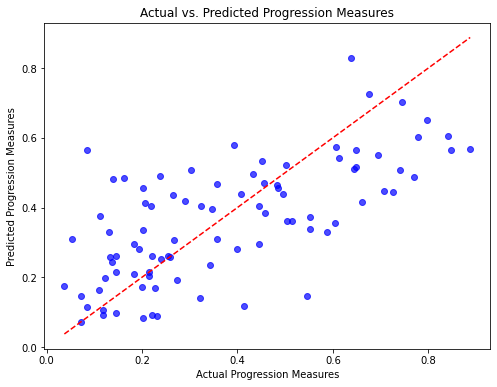

In [15]:
def plot_results(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.title('Actual vs. Predicted Progression Measures')
    plt.xlabel('Actual Progression Measures')
    plt.ylabel('Predicted Progression Measures')
    plt.show()
    
plot_results(y_test, y_test_pred)

In [16]:
def print_statics(data, mse, mae, rmse, r2):
    print(f'--------------------------------------\nStatistics For {data}\n--------------------------------------')
    print(f'mean squared error: {mse}')
    print(f'mean absolute error: {mae}')
    print(f'root mean squared error: {rmse}')
    print(f'r2 score: {r2}')

def calc_metrics(y_true, y_pred):
    mse = calc_mean_squared_error(y_true, y_pred)
    mae = calc_mean_absolute_error(y_true, y_pred)
    rmse = calc_root_mean_squared_error(y_true, y_pred)
    r2 = calc_r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

mse, mae, rmse, r2 = calc_metrics(y_test, y_test_pred)
print_statics('Test Data', mse, mae, rmse, r2)


--------------------------------------
Statistics For Test Data
--------------------------------------
mean squared error: 0.028146015940193524
mean absolute error: 0.133314936696573
root mean squared error: 0.16776774403976924
r2 score: 0.4526027629719195


In [17]:
y_train_pred = train_linear_regression(X_train, y_train, X_train)
mse, mae, rmse, r2 = calc_metrics(y_train, y_train_pred)
print_statics('Train Data', mse, mae, rmse, r2)

--------------------------------------
Statistics For Train Data
--------------------------------------
mean squared error: 0.02783891560481339
mean absolute error: 0.1354626278005621
root mean squared error: 0.166849979337168
r2 score: 0.52791938633615


<style>
table {
    margin-left: auto;
    margin-right: auto;
}
</style>

| Data Type / Optimizer   | MSE   | MAE   | RMSE  | $R^{2}$ Score |                                                                 
|:------------------------|:------|:------|:------|:--------------|
| Train Set               | 0.027 | 0.13  | 0.16  | 0.52          |
| Test Set                | 0.028 | 0.13  | 0.16  | 0.45          |


## Part 4: Ordinary Least Squares (OLS)

### Using Functions from sklearn.metrics

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def sklearn_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

mse, mae, rmse, r2 = sklearn_metrics(y_test, y_test_pred)
print_statics('Test Data', mse, mae, rmse, r2)

--------------------------------------
Statistics For Test Data
--------------------------------------
mean squared error: 0.02814601594019353
mean absolute error: 0.133314936696573
root mean squared error: 0.16776774403976924
r2 score: 0.45260276297191937


In [19]:
mse, mae, rmse, r2 = sklearn_metrics(y_train, y_train_pred)
print_statics('Train Data', mse, mae, rmse, r2)

--------------------------------------
Statistics For Train Data
--------------------------------------
mean squared error: 0.0278389156048134
mean absolute error: 0.13546262780056198
root mean squared error: 0.16684997933716803
r2 score: 0.5279193863361498


As we can see, the results are similar to the ones we implemented before.

In [20]:
import statsmodels.api as sm
ols_model = sm.OLS(y_train, X_train)
ols_results = ols_model.fit()
y_pred = ols_results.predict(X_test)
display(ols_results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     disease-progression   R-squared (uncentered):                   0.873
Model:                             OLS   Adj. R-squared (uncentered):              0.869
Method:                  Least Squares   F-statistic:                              235.7
Date:                 Sat, 20 Apr 2024   Prob (F-statistic):                   4.57e-147
Time:                         14:24:43   Log-Likelihood:                          130.71
No. Observations:                  353   AIC:                                     -241.4
Df Residuals:                      343   BIC:                                     -202.7
Df Model:                           10                                                  
Covariance Type:             nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0239      0.047      0.511      0.610      -0.068       0.116
sex           -0.0735      0.020     -3.620      0.000      -0.113      -0.034
bmi            0.4410      0.063      7.052      0.000       0.318       0.564
bp             0.2606      0.054      4.810      0.000       0.154       0.367
s1            -0.4802      0.208     -2.311      0.021      -0.889      -0.072
s2             0.2279      0.220      1.034      0.302      -0.206       0.661
s3            -0.0461      0.077     -0.601      0.548      -0.197       0.105
s4             0.1485      0.131      1.138      0.256      -0.108       0.405
s5             0.4792      0.103      4.654      0.000       0.277       0.682
s6             0.0362      0.062      0.580      0.562      -0.086       0.159
==============================================================================
Omnibus:                        1.535   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.464   Jarque-Bera (JB):                1.503
Skew:                           0.081   Prob(JB):                        0.472
Kurtosis:                       2.724   Cond. No.                         48.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""